In [71]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

In [72]:
# Training a multi layer percetro for data with two classes
data = np.loadtxt(r'\Users\alana\Documents\TecMTY\RoboticaInteligente\DeepLearning\red_neronal\mist_data\misterious_data_1.txt')
x = data[:,1:]
y = data[:,0]

# Train MLP classifier with all available observations
clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000)
clf.fit(x, y)

# Applying cross validation
kf = KFold(n_splits=5, shuffle = True)

acc = 0
for train_index, test_index in kf.split(x):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_i = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000)
    clf_i.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]    
    y_pred = clf_i.predict(x_test)

    # Calculate confusion matrix and model performance
    cm = confusion_matrix(y_test, y_pred)
    acc_i = (cm[0,0]+cm[1,1])/len(y_test)    
    print('acc = ', acc_i)

    acc += acc_i 

acc = acc/5
print('ACC = ', acc)

acc =  0.7735849056603774
acc =  0.8113207547169812
acc =  0.7452830188679245
acc =  0.7142857142857143
acc =  0.7428571428571429
ACC =  0.757466307277628


In [73]:
# Training a multi perceptron using data with four classes
data_two = np.loadtxt(r'\Users\alana\Documents\TecMTY\RoboticaInteligente\DeepLearning\red_neronal\mist_data\misterious_data_4.txt')
x = data[:,1:]
y = data[:,0]

# Train MLP classifier with all available observations
clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000)
clf.fit(x, y)

# Applying cross validation
kf = KFold(n_splits=5, shuffle = True)

acc = 0
for train_index, test_index in kf.split(x):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_i = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000)
    clf_i.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]    
    y_pred = clf_i.predict(x_test)

    # Calculate confusion matrix and model performance
    cm = confusion_matrix(y_test, y_pred)
    acc_i = np.trace(cm) / np.sum(cm)   
    print('acc = ', acc_i)

    acc += acc_i 

acc = acc/5
print('ACC = ', acc)

acc =  0.7169811320754716
acc =  0.8584905660377359
acc =  0.7641509433962265
acc =  0.8571428571428571
acc =  0.7714285714285715
ACC =  0.7936388140161725


-----------Variable 0
MSE:  5747.344556115572
R^2:  0.03078311703654124


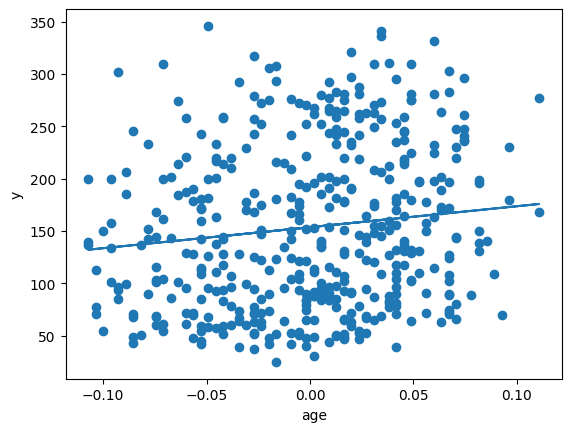

-----------Variable 1
MSE:  5922.768307112345
R^2:  0.0012001227547849824


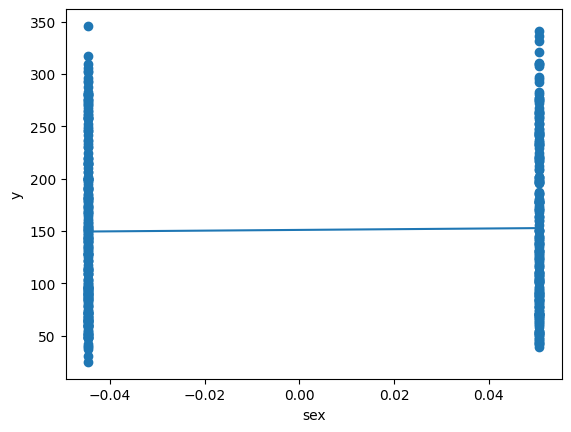

-----------Variable 2
MSE:  3903.7979253664607
R^2:  0.34167391218665366


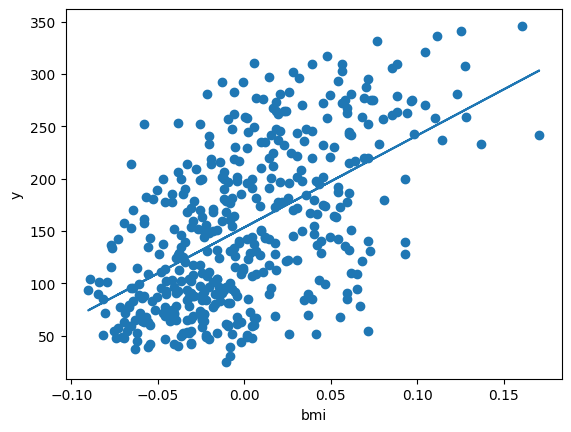

-----------Variable 3
MSE:  4833.504692030044
R^2:  0.1848906385099618


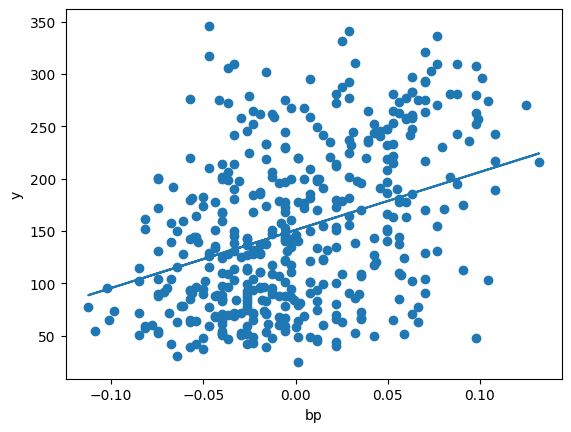

-----------Variable 4
MSE:  5719.962876549005
R^2:  0.03540069057170936


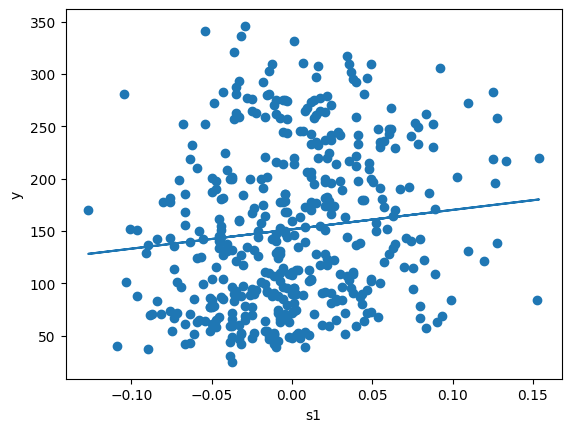

-----------Variable 5
MSE:  5781.927386200506
R^2:  0.024951160651864757


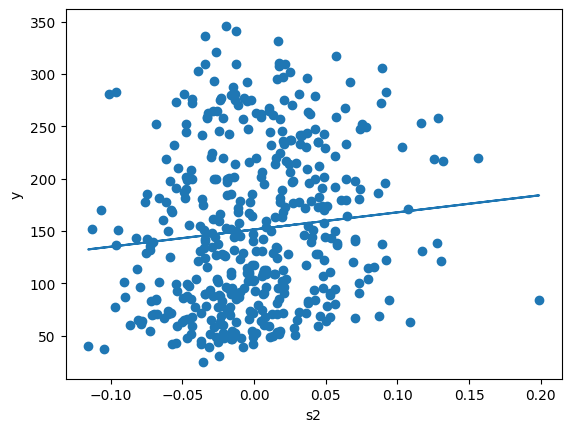

-----------Variable 6
MSE:  5039.0065970236265
R^2:  0.1502353444248008


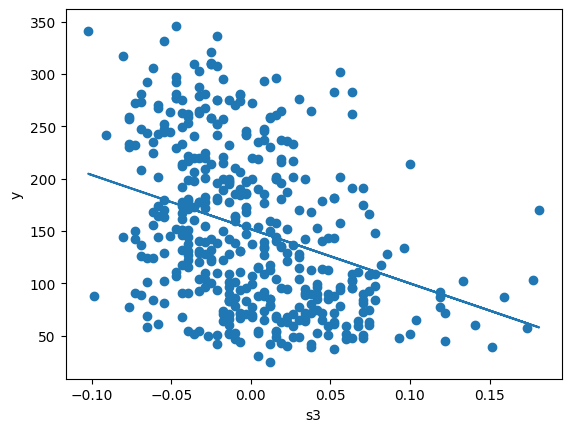

-----------Variable 7
MSE:  4846.50166022526
R^2:  0.1826988643994747


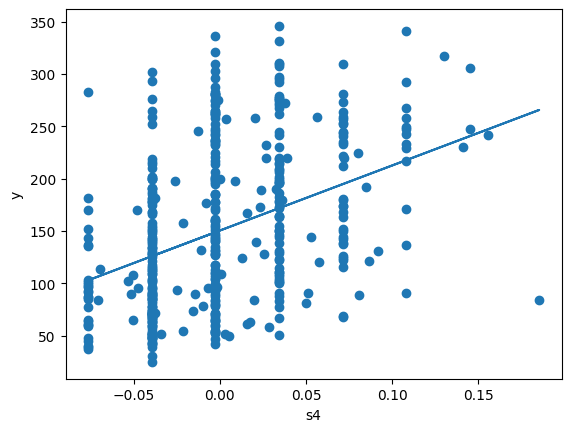

-----------Variable 8
MSE:  4051.0762870240246
R^2:  0.316837281422657


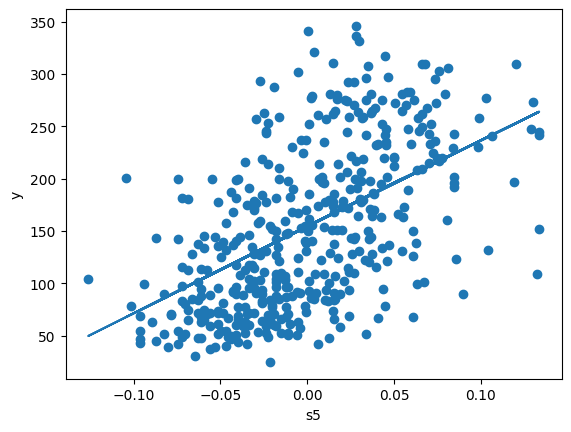

-----------Variable 9
MSE:  5154.128047977166
R^2:  0.1308215694603796


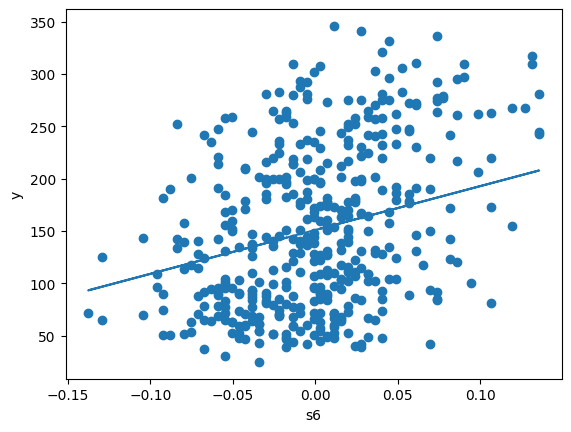

Average MSE:  5100.001833562401
Average R^2:  0.1399492701418828


In [74]:
# Using diabetes dataset to evaluate in a multilayer perceptron

#Loading data and checking it
diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target
features = diabetes.feature_names
n_features = len(features)

# Entrenando el regresor MLP
regressor = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=10000)
regressor.fit(x, y)

# Aplicando validacion cruzada
kf = KFold(n_splits=5, shuffle=True)

mse = 0
r2 = 0

# Train MLP regressor for one variable
for var in range(n_features):
    print('-----------Variable', var)

    regressor_i = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=10000)
    regressor_i.fit(x[:, var].reshape(-1, 1), y)

    y_pred = regressor_i.predict(x[:, var].reshape(-1, 1))
    mse_i = mean_squared_error(y, y_pred)
    r2_i = r2_score(y, y_pred)

    mse += mse_i
    r2 += r2_i

    print('MSE: ', mse_i)
    print('R^2: ', r2_i)

    plt.scatter(x[:, var], y)
    plt.plot(x[:, var], y_pred)
    plt.xlabel(features[var])
    plt.ylabel('y')
    plt.show()

mse /= n_features
r2 /= n_features

print('Average MSE: ', mse)
print('Average R^2: ', r2)

In [75]:
# Loading the diabetes dataset
diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target
features = diabetes.feature_names
n_features = len(features)

# Define MLP model
clf = Sequential()
clf.add(Dense(10, input_dim=n_features, activation='relu'))
clf.add(Dense(10, activation='relu'))
clf.add(Dense(3, activation='softmax'))

# Compile model
clf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model
kf = KFold(n_splits=5, shuffle=True)

acc = 0
recall = np.array([0., 0., 0.])

for train_index, test_index in kf.split(x):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    y_train = np_utils.to_categorical(y_train)  # Convert labels to categorical

    clf_cv = Sequential()
    clf_cv.add(Dense(10, input_dim=n_features, activation='relu'))
    clf_cv.add(Dense(10, activation='relu'))
    clf_cv.add(Dense(3, activation='softmax'))
    clf_cv.compile(loss='categorical_crossentropy', optimizer='adam')
    clf_cv.fit(x_train, y_train, epochs=150, batch_size=5, verbose=0)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = np.argmax(clf_cv.predict(x_test), axis=-1)

    cm = confusion_matrix(y_test, y_pred)

    acc += (cm[0, 0] + cm[1, 1] + cm[2, 2]) / len(y_test)

    recall[0] += cm[0, 0] / (cm[0, 0] + cm[0, 1] + cm[0, 2])
    recall[1] += cm[1, 1] / (cm[1, 0] + cm[1, 1] + cm[1, 2])
    recall[2] += cm[2, 2] / (cm[2, 0] + cm[2, 1] + cm[2, 2])

acc /= 5
print('ACC = ', acc)

recall /= 5
print('RECALL = ', recall)

ValueError: in user code:

    File "C:\Users\alana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\alana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\alana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\alana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\alana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\alana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\alana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\alana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\alana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\alana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 347) and (None, 3) are incompatible
